Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Importing dataset

In [2]:
churn = pd.read_csv('Telco-Customer-Churn.csv')

In [39]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

---------------------------------------
1.What is the distribution of tenure?
------------------------------------------

In [ ]:
1.What is the distribution of tenure

In [8]:
churn.tenure.isnull().sum()

0

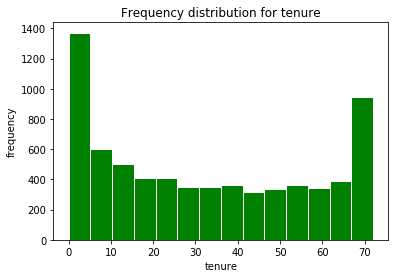

In [36]:
plt.hist(churn['tenure'],color= 'green',edgecolor='white',bins=14)
plt.xlabel('tenure')
plt.ylabel('frequency')
plt.title('Frequency distribution for tenure')
plt.show()

From the above frequency distribution plot for tenure, we can observe that distribution is high towards 0-5 and 65-75 range. 
Apart from it, it is almost flat for remaing distribution.

So it is almost uniformly distributed column in churn dataset

------------------------------------------------
2.How is the distribution of monthly charges?
--------------------------------------------------

In [19]:
churn.MonthlyCharges.isnull().sum()

0

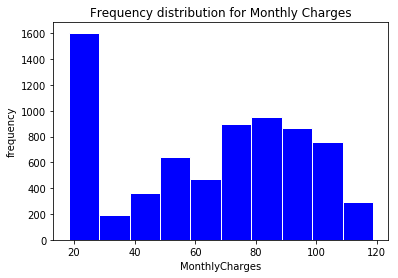

In [34]:
plt.hist(churn['MonthlyCharges'],color= 'blue',edgecolor='white',bins=10)
plt.xlabel('MonthlyCharges')
plt.ylabel('frequency')
plt.title('Frequency distribution for Monthly Charges')
plt.show()

From above frequency plot for monthly chaarges, we can say that:
    -data is normally distributed.
    -Maximum distributiion is along 20-30.
    -Data is negatively skewed and mean < median

In [38]:
churn.MonthlyCharges.skew()

-0.22052443394398033

--------------------------------------------------------------
3.What is the part to whole relationship of Internet Service?
--------------------------------------------------------------

In [41]:
churn.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [44]:
ins = churn.groupby(['InternetService']).size()
ins = pd.DataFrame(ins)
ins = ins.reset_index()
ins = ins.rename(columns={0:'Count'})
ins

,InternetService,Count
0,DSL,2421
1,Fiber optic,3096
2,No,1526


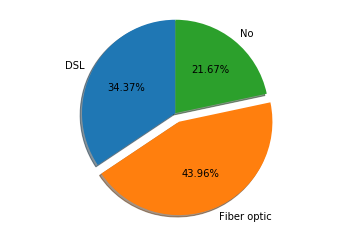

In [48]:
plt.pie(ins['Count'],shadow=True,explode = (0, 0.1, 0),labels=ins['InternetService'],autopct='%1.2f%%',startangle=90)
plt.axis('equal')
plt.show()

From above pie chart, we can say that fiber optic is covering major portion of internet service with 44% share.

--------------------------------------------------------------------------------
4.Which contract is most common? What is the percantage of most common contract?
---------------------------------------------------------------------------------

In [51]:
churn.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [54]:
cn = churn.groupby(['Contract']).size()
cn = pd.DataFrame(cn)
cn = cn.reset_index()
cn = cn.rename(columns={0:'Count'})
cn

,Contract,Count
0,Month-to-month,3875
1,One year,1473
2,Two year,1695


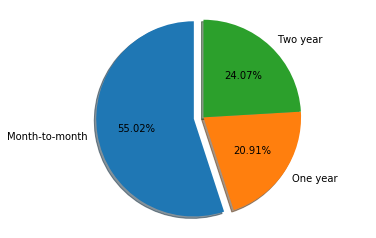

In [58]:
plt.pie(cn['Count'],shadow=True,explode = (0.1, 0, 0),labels=cn['Contract'],autopct='%1.2f%%',startangle=90)
plt.axis('equal')
plt.show()

From the pie chart, we can say that month-to-moth contract is most common and percentage coverage for this is 55%

--------------------------------------------------------------------------
5.What is the part to whole relationship of MultipleLines?
--------------------------------------------------------------------------

In [60]:
churn.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [63]:
ml = churn.groupby(['MultipleLines']).size()
ml = pd.DataFrame(ml)
ml = ml.reset_index()
ml = ml.rename(columns={0:'Count'})
ml

,MultipleLines,Count
0,No,3390
1,No phone service,682
2,Yes,2971


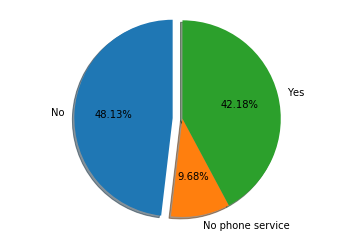

In [64]:
plt.pie(ml['Count'],shadow=True,explode = (0.1, 0, 0),labels=ml['MultipleLines'],autopct='%1.2f%%',startangle=90)
plt.axis('equal')
plt.show()

48% is for no MultipleLines

--------------------------------------------------------------------------
6.What is the ratio of churn and not churn?
--------------------------------------------------------------------------

In [67]:
churn.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [84]:
churn[['Churn']][churn.Churn == 'Yes'].count()/churn[['Churn']][churn.Churn == 'No'].count()

Churn    0.361229
dtype: float64

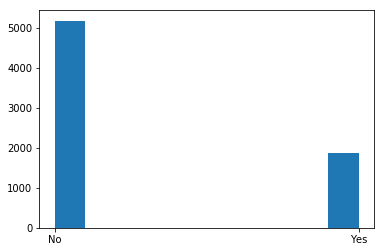

In [90]:
plt.hist(churn.Churn)
plt.show()

-----------------------------------------------------------------------
7.What is the percentage of senior citizens?
------------------------------------------------------------------------

In [79]:
sc = churn.groupby(['SeniorCitizen']).size()
sc = pd.DataFrame(sc)
sc = sc.reset_index()
sc = sc.rename(columns={0:'Count'})
sc

,SeniorCitizen,Count
0,0,5901
1,1,1142


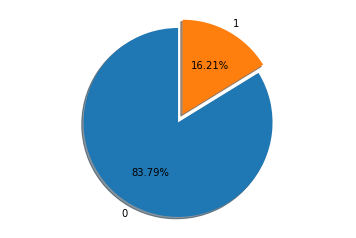

In [82]:
plt.pie(sc['Count'],shadow=True,explode = ( 0.1, 0),labels=sc['SeniorCitizen'],autopct='%1.2f%%',startangle=90)
plt.axis('equal')
plt.show()

In [4]:
pmt_method = churn.groupby(['PaymentMethod']).size()
pmt_method = pd.DataFrame(pmt_method)
pmt_method = pmt_method.reset_index()
pmt_method = pmt_method.rename(columns = {0 : 'Count'})
pmt_method

,PaymentMethod,Count
0,Bank transfer (automatic),1544
1,Credit card (automatic),1522
2,Electronic check,2365
3,Mailed check,1612


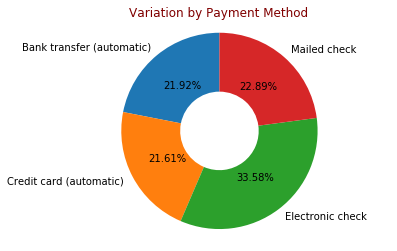

In [5]:
col = ['red','green','blue','black']

plt.pie(pmt_method['Count'],labels = pmt_method['PaymentMethod'],labeldistance = 1.1,
       autopct='%1.2f%%',startangle=90,wedgeprops = dict(width=0.6),radius = 1)

plt.title("Variation by Payment Method",loc = 'center',color = 'maroon')
plt.axis('equal')
plt.show()

In [7]:
pmt_by_gdr = churn.groupby(['PaymentMethod','gender']).size()
pmt_by_gdr = pd.DataFrame(pmt_by_gdr)
pmt_by_gdr = pmt_by_gdr.reset_index()
pmt_by_gdr = pmt_by_gdr.rename(columns = {0 : 'Count'})
pmt_by_gdr

,PaymentMethod,gender,Count
0,Bank transfer (automatic),Female,788
1,Bank transfer (automatic),Male,756
2,Credit card (automatic),Female,752
3,Credit card (automatic),Male,770
4,Electronic check,Female,1170
5,Electronic check,Male,1195
6,Mailed check,Female,778
7,Mailed check,Male,834


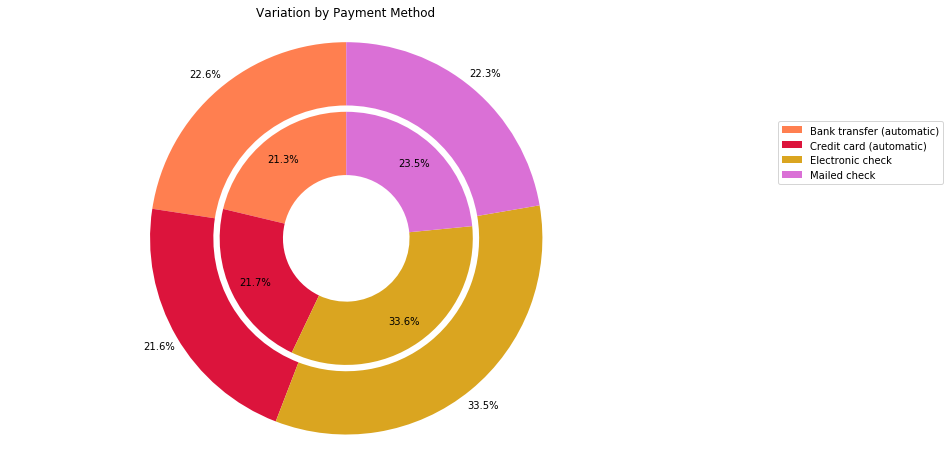

In [18]:
col = ['coral','crimson','goldenrod','orchid']

fig = plt.figure(figsize = (12,8))
plt.pie(pmt_by_gdr[pmt_by_gdr['gender']=='Male']['Count'],
       autopct='%0.1f%%',pctdistance = 0.8,startangle=90,
        wedgeprops = dict(width=0.5),radius = 1,colors = col)

plt.pie(pmt_by_gdr[pmt_by_gdr['gender']=='Female']['Count'],
       autopct='%0.1f%%',pctdistance = 1.1,startangle=90,
        wedgeprops = dict(width=0.5),radius = 1.55,colors = col)

plt.title('Variation by Payment Method',loc = 'center')
plt.legend(labels = pmt_by_gdr[pmt_by_gdr['gender']=='Male']['PaymentMethod'],
          loc = 'right',bbox_to_anchor=(1.4,0.7))
plt.axis('equal')
plt.show()